In [28]:
import numpy as np
import random
from numpy import exp, log
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [29]:
from IPython.display import HTML
HTML('''<script>
 $('div.output_stderr').hide();
</script>''')

In [37]:
n = 4
C = np.array([[1,  8, 2,  10 ],
              [8,  1, 5,  1  ],
              [2,  5, 1,  10 ], 
              [10, 1, 10, 1]])
p = np.array([4, 6, 10, 10])  # i = 1, ..., n
q = np.array([7, 7, 7, 9])  # j = 1, ..., n

gamma = 1
xk = 1/n**2 * np.ones((n, n))

In [31]:
def genExp(n):
    random.seed()
    C = np.ones((n,n))
    p = np.ones(n)
    q = np.ones(n)
    for i in range(n):
        for j in range(n):
            r = random.random()
            C[i, j] = r * 100
            #C[j, i] = r
            if j == i:
                C[j, i] = 10
        p[i] = random.random()
        q[i] = random.random()
    p = p / sum(p)
    q = q / sum(q)
    return C, p, q

In [32]:
def cos(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [33]:
N = 4
i = np.linspace(0 , N ** 2 - 1, N ** 2)
j = np.linspace(0 , N ** 2 - 1, N ** 2)
a1 = i // N
a2 = i % N
a1 = j // N
a2 = j % N
a = np.array([ i // N, i % N])
b = np.array([j // N, j % N])
C = norm(np.array([ i // N, i % N]) - np.array([j // N, j % N]), 2)
C

0.0

In [45]:
eps = 1e-6


def synkhornIt(C, p, q, gamma, eps, eps1):
    eps = 1e-3
    eps1 = 1e-7
    n = p.shape[0]
    l = np.ones(n)
    m = np.ones(n)

    X_new = 1/n**2 * np.ones((n, n))
    t = 0
    tt = 0
    while True:
        tt += 1
        X = X_new
        while not (sum(abs(norm(X_new, 1, axis=1) - p)) + sum(abs(norm(X_new, 1, axis=0) - q)) <= eps):
            
            for i in range(n):
                l[i] = gamma * log(1/p[i] * sum([exp(-(gamma + C[i, j] + m[j])/gamma) * X[i, j] for j in range(n)]))
            for j in range(n):
                m[j] = gamma * log(1/q[j] * sum([exp(-(gamma + C[i, j] + l[i])/gamma) * X[i, j] for i in range(n)]))
            for i in range(n):
                for j in range(n):
                    X[i,j] = X[i, j] * exp(- (gamma + C[i,j] + l[i] + m[j])/gamma)
            #X_new = X * np.array(exp( -(gamma + C + np.matrix(l).T + m)/gamma ))
            t += 1

        if norm(X_new - X, 2) <= eps1:
            break
    return X_new, tt, t

def synkhorn (C, p, q, gamma, eps, eps1):
    p = p / sum(p)
    q = q / sum(q)
    n = C.shape[0]
    xk = 1/n**2 * np.ones((n, n))
    l = np.ones(n)
    m = np.ones(n)
    X = np.ones((n, n)) * 1/(n**2)
    t = 0
    X_new = 1/n**2 * np.ones((n, n))
    t = 0
    tt = 0
    while True:
        X = X_new
        while not (sum(abs(norm(X_new, 1, axis=1) - p)) + sum(abs(norm(X_new, 1, axis=0) - q)) <= eps):
            
            l = gamma * log(1/p * norm(exp(-(gamma + C + m) / gamma) * X, 1, axis=1))
            m = gamma * log(1/q * norm(exp(-(gamma + C + l) / gamma) * X, 1, axis=1))
            X_new = X * np.array(exp( -(gamma + C + np.matrix(l).T + m)/gamma ))
            t += 1
            print(t, sum(abs(norm(X_new, 1, axis=1) - p)) + sum(abs(norm(X_new, 1, axis=0) - q)))
        if norm(X_new - X, 2) <= eps1:
            break
        tt += 1
    return X_new, tt, t

In [ ]:
n_test = 15

C, p, q = genExp(n_test)
eps = 1e-3
eps1 = 1e-7
tts = []
gms = []
gamma = 1000
C, p, q = genExp(n_test)
for i in range(14):
    gamma /= 2
    X, tt, t = synkhornIt(C, p, q, gamma, eps, eps1)
    gms.append(gamma)
    tts.append(t)
    print((i+1)/14)
    

0.07142857142857142
0.14285714285714285
0.21428571428571427
0.2857142857142857
0.35714285714285715
0.42857142857142855
0.5
0.5714285714285714
0.6428571428571429


/home/peter/.local/lib/python3.5/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/home/peter/.local/lib/python3.5/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


[(500.0, 4), (250.0, 4), (125.0, 12), (62.5, 32), (31.25, 62), (15.625, 206), (7.8125, 319), (3.90625, 589)]


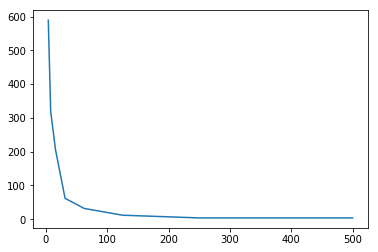

In [67]:
gts = [(5.0, 22), (2.5, 13), (1.25, 14), (0.625, 20), (0.3125, 25), (0.15625, 31), (0.078125, 45), (0.0390625, 73)]
print(list(zip(gms, tts)))
plt.plot(gms, tts)